Creamos una carpeta datasets e importamos el dataset JPV

In [ ]:
!mkdir -p ./local/datasets/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo" -O local/datasets/Dataset_JPV.zip && rm -rf /tmp/cookies.txt

--2021-05-06 22:11:28--  https://docs.google.com/uc?export=download&confirm=G8wc&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo
Resolving docs.google.com (docs.google.com)... 142.250.73.206, 2607:f8b0:4004:829::200e
Connecting to docs.google.com (docs.google.com)|142.250.73.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-38-docs.googleusercontent.com/docs/securesc/mf9e7q2s769e5de6cj531gm5rgki5ubb/lvfb6t44ep867re0vdtk06tpem3i1mbn/1620339075000/14059520846711589950/14732244105602418741Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download [following]
--2021-05-06 22:11:28--  https://doc-0s-38-docs.googleusercontent.com/docs/securesc/mf9e7q2s769e5de6cj531gm5rgki5ubb/lvfb6t44ep867re0vdtk06tpem3i1mbn/1620339075000/14059520846711589950/14732244105602418741Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download
Resolving doc-0s-38-docs.googleusercontent.com (doc-0s-38-docs.googleusercontent.com)... 142.250.73.193, 2607:f8b0:4004:829::2001
Connecting to doc-0

Importamos el modelo my_model.7zp de Drive propio

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15OyyblhXMavMR5vmRTr5xACykB9RDb3E' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15OyyblhXMavMR5vmRTr5xACykB9RDb3E" -O local/datasets/my_model.7z && rm -rf /tmp/cookies.txt

--2021-05-06 22:11:43--  https://docs.google.com/uc?export=download&confirm=&id=15OyyblhXMavMR5vmRTr5xACykB9RDb3E
Resolving docs.google.com (docs.google.com)... 142.250.65.78, 2607:f8b0:4004:829::200e
Connecting to docs.google.com (docs.google.com)|142.250.65.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-50-docs.googleusercontent.com/docs/securesc/971p4ui9b7h9avm1ornemm27uobqpq03/6aotdgfrl1joqkqtak24uv1ibls85dna/1620339075000/14059520846711589950/02602839380560591565Z/15OyyblhXMavMR5vmRTr5xACykB9RDb3E?e=download [following]
--2021-05-06 22:11:51--  https://doc-0o-50-docs.googleusercontent.com/docs/securesc/971p4ui9b7h9avm1ornemm27uobqpq03/6aotdgfrl1joqkqtak24uv1ibls85dna/1620339075000/14059520846711589950/02602839380560591565Z/15OyyblhXMavMR5vmRTr5xACykB9RDb3E?e=download
Resolving doc-0o-50-docs.googleusercontent.com (doc-0o-50-docs.googleusercontent.com)... 142.250.73.193, 2607:f8b0:4004:829::2001
Connecting to doc-0o-50-d

Se descomprime el conjunto de datos y el modelo

In [ ]:
# unzip your file
!unzip -o local/datasets/Dataset_JPV.zip -d Dataset_JPV > /dev/null
!7za e local/datasets/my_model.7z #my_model > /dev/null 
#!unzip -o /local/datasets/my_model.7z -d my_model > /dev/null



mapname:  conversion of  failed

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 75048254 bytes (72 MiB)

Extracting archive: local/datasets/my_model.7z
--
Path = local/datasets/my_model.7z
Type = 7z
Physical Size = 75048254
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      3%      6% - my_model.h5                   10% - my_model.h5                   14% - my_model.h5                   19% - my_model.h5                   23% - my_model.h5                   27% - my_model.h5                   30% - my_model.h5

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

setting tensorflow version in colab


'2.4.1'

In [ ]:
#import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from local.lib import mlutils # no se logro instalar las utilidades
import pickle, bz2
from skimage import io
%matplotlib inline

## function Getdata

In [ ]:
# load data func
import glob
from keras.preprocessing import image as kImage

def getData(dataset_dir):
    X_list= sorted(glob.glob(os.path.join(dataset_dir, 'x','*.jpg')))
    Y_list = sorted(glob.glob(os.path.join(dataset_dir, 'y' ,'*.png')))
    print(X_list)
    print(Y_list)
    X= []
    Y= []
    for i in range(len(X_list)):
        # Load input image
        x = kImage.load_img(X_list[i])
        x = kImage.img_to_array(x)
        X.append(x)
        
        # Load ground-truth label and encode it to label 0 and 1
        y = kImage.load_img(Y_list[i], color_mode = "grayscale")#grayscale = True)
        y = kImage.img_to_array(y)
        y /= 255.0
        y = np.floor(y)# ?
        Y.append(y)
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    # Shuffle the training data
    idx = list(range(X.shape[0]))
    np.random.shuffle(idx)
    X = X[idx]
    Y = Y[idx]
    return X, Y

Ejemplo de serializaciòn: https://www.tensorflow.org/guide/keras/save_and_serialize#weights_only_saving_in_savedmodel_format

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow as tf

tf.keras.backend.clear_session()  # Para restablecer fácilmente el estado del portátil.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dataset_path1 = os.path.join('Dataset_JPV', 'train')
X_train, Y_train = getData(dataset_path1)
X_val = X_train[-200:]
Y_val = Y_train[-200:]

['Dataset_JPV/train/x/img0.jpg', 'Dataset_JPV/train/x/img1.jpg', 'Dataset_JPV/train/x/img10.jpg', 'Dataset_JPV/train/x/img100.jpg', 'Dataset_JPV/train/x/img1000.jpg', 'Dataset_JPV/train/x/img1001.jpg', 'Dataset_JPV/train/x/img1002.jpg', 'Dataset_JPV/train/x/img1003.jpg', 'Dataset_JPV/train/x/img1004.jpg', 'Dataset_JPV/train/x/img1005.jpg', 'Dataset_JPV/train/x/img1006.jpg', 'Dataset_JPV/train/x/img1007.jpg', 'Dataset_JPV/train/x/img1008.jpg', 'Dataset_JPV/train/x/img1009.jpg', 'Dataset_JPV/train/x/img101.jpg', 'Dataset_JPV/train/x/img1010.jpg', 'Dataset_JPV/train/x/img1011.jpg', 'Dataset_JPV/train/x/img1012.jpg', 'Dataset_JPV/train/x/img1013.jpg', 'Dataset_JPV/train/x/img1014.jpg', 'Dataset_JPV/train/x/img1015.jpg', 'Dataset_JPV/train/x/img1016.jpg', 'Dataset_JPV/train/x/img1017.jpg', 'Dataset_JPV/train/x/img1018.jpg', 'Dataset_JPV/train/x/img1019.jpg', 'Dataset_JPV/train/x/img102.jpg', 'Dataset_JPV/train/x/img1020.jpg', 'Dataset_JPV/train/x/img1021.jpg', 'Dataset_JPV/train/x/img1022.j

In [ ]:
dataset_path = os.path.join('Dataset_JPV', 'test')#chance to train
X, Y = getData(dataset_path)

['Dataset_JPV/test/x/img0.jpg', 'Dataset_JPV/test/x/img1.jpg', 'Dataset_JPV/test/x/img10.jpg', 'Dataset_JPV/test/x/img100.jpg', 'Dataset_JPV/test/x/img101.jpg', 'Dataset_JPV/test/x/img102.jpg', 'Dataset_JPV/test/x/img103.jpg', 'Dataset_JPV/test/x/img104.jpg', 'Dataset_JPV/test/x/img105.jpg', 'Dataset_JPV/test/x/img106.jpg', 'Dataset_JPV/test/x/img107.jpg', 'Dataset_JPV/test/x/img108.jpg', 'Dataset_JPV/test/x/img109.jpg', 'Dataset_JPV/test/x/img11.jpg', 'Dataset_JPV/test/x/img110.jpg', 'Dataset_JPV/test/x/img111.jpg', 'Dataset_JPV/test/x/img112.jpg', 'Dataset_JPV/test/x/img113.jpg', 'Dataset_JPV/test/x/img114.jpg', 'Dataset_JPV/test/x/img115.jpg', 'Dataset_JPV/test/x/img116.jpg', 'Dataset_JPV/test/x/img117.jpg', 'Dataset_JPV/test/x/img118.jpg', 'Dataset_JPV/test/x/img119.jpg', 'Dataset_JPV/test/x/img12.jpg', 'Dataset_JPV/test/x/img120.jpg', 'Dataset_JPV/test/x/img121.jpg', 'Dataset_JPV/test/x/img122.jpg', 'Dataset_JPV/test/x/img123.jpg', 'Dataset_JPV/test/x/img124.jpg', 'Dataset_JPV/tes

In [ ]:
new_model = keras.models.load_model('my_model.h5')

In [ ]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 320, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 80, 128)       0   

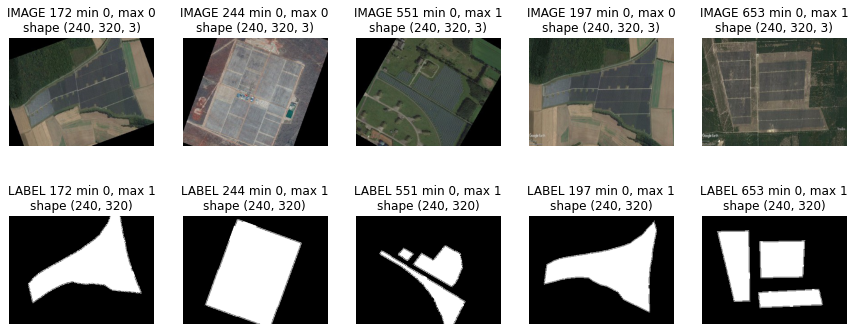

In [ ]:
def show_img(img, title="", cmap=None, details=True):
    plt.imshow(img, cmap=cmap)#, cmap=cmap
    if details:
        plt.title("%s min %d, max %d\nshape %s"%(title, np.min(img), np.max(img), str(img.shape)))
    else:
        plt.title(title)
    plt.axis("off")
    
plt.figure(figsize=(15,6))
ids = np.random.permutation(len(X))[:5]
for c,i in enumerate(ids):
    plt.subplot(2,5,c+1)
    show_img(X[i]/255, "IMAGE %d"%i)#.mean(axis=2)
    plt.subplot(2,5,c+6)
    show_img(np.squeeze(Y[i]), "LABEL %d"%i, cmap=plt.cm.Greys_r)

In [ ]:
X_train.shape,X.shape

((2864, 240, 320, 3), (716, 240, 320, 3))

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
def IoU_metric(y_true, y_pred, threshold=0.5):   
    y_pred = K.squeeze(tf.cast(y_pred>threshold,tf.int32),-1)
    y_true = K.cast(y_true[..., 0], K.floatx())
    y_pred = K.cast(y_pred, K.floatx())
    truth_areas = K.sum(y_true, axis=[1, 2])
    pred_areas = K.sum(y_pred, axis=[1, 2])
    intersection = K.sum(y_true * y_pred, axis=[1, 2])
    union = K.clip(truth_areas + pred_areas - intersection, 1e-9, 128 * 128)
    check = K.map_fn(lambda x: K.equal(x, 0), truth_areas + pred_areas, dtype=tf.bool)
    p = intersection / union
    iou = K.switch(check, p + 1., p)

    prec = K.map_fn(lambda x: K.mean(K.greater(x, np.arange(0.5, 1.0, 0.05))), iou, dtype=tf.float32)
    prec_iou = K.mean(prec)
    return prec_iou

In [ ]:
def get_model(num_classes, img_size=320, compile=True):
    print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(240,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(64,(3,3),padding="same", activation="relu")(inputs)
    layers = tf.keras.layers.Conv2D(64,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(128,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(128,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(256,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(256,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(256,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(512,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(512,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(512,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(512,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(512,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(512,(3,3),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2DTranspose(256,(3,3),strides=(2,2),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2DTranspose(128,(3,3),strides=(2,2),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),padding="same", activation="relu")(layers)
    layers = tf.keras.layers.Conv2DTranspose(32,(3,3),strides=(2,2),padding="same", activation="relu")(layers)
    outputs = tf.keras.layers.Conv2DTranspose(1,(1,1),padding="same", activation='sigmoid')(layers)
    model = tf.keras.Model(inputs = inputs, outputs=outputs)
    if compile:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[ dice_coef,IoU_metric])#metrics=['accuracy']
    return model

In [ ]:
num_classes = 33
model = get_model(num_classes)
model.summary()

using 33 classes
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 320, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 240, 320, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 320, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 160, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 160, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 160, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 80, 

In [ ]:
model.reset_states()
results=model.fit(X_train, Y_train,  validation_split=0.1 , batch_size=8, epochs=32, validation_data=(X_val,Y_val))

Epoch 1/32
Instructions for updating:
Use fn_output_signature instead
323/323 [==============================] - 122s 263ms/step - loss: 0.6558 - dice_coef: 0.3344 - IoU_metric: 0.0203 - val_loss: 0.5093 - val_dice_coef: 0.3409 - val_IoU_metric: 0.0000e+00
Epoch 2/32
323/323 [==============================] - 80s 247ms/step - loss: 0.4706 - dice_coef: 0.3968 - IoU_metric: 0.0968 - val_loss: 0.3776 - val_dice_coef: 0.5233 - val_IoU_metric: 0.4605
Epoch 3/32
323/323 [==============================] - 80s 247ms/step - loss: 0.3828 - dice_coef: 0.5672 - IoU_metric: 0.5213 - val_loss: 0.2646 - val_dice_coef: 0.7443 - val_IoU_metric: 0.7816
Epoch 4/32
323/323 [==============================] - 79s 246ms/step - loss: 0.2542 - dice_coef: 0.7122 - IoU_metric: 0.7471 - val_loss: 0.2002 - val_dice_coef: 0.7944 - val_IoU_metric: 0.8256
Epoch 5/32
323/323 [==============================] - 80s 247ms/step - loss: 0.2070 - dice_coef: 0.7688 - IoU_metric: 0.7956 - val_loss: 0.1830 - val_dice_coef: 0.7

In [ ]:
# Predict on train, val and test
#model = load_model('model-dsbowl2018-1.h5')#, custom_objects={'mean_iou': mean_iou})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_ttrain = model.predict(X_train, verbose=1)
preds_test = model.predict(X, verbose=1)

# Threshold predictions
preds_train_tt = (preds_ttrain > 0.5).astype(np.uint8)
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

In [ ]:
#results1=model.evaluate(X,Y,batch_size=128)
#print("test loss, test acc:", results1)
# print(results.history.items)

<built-in method items of dict object at 0x7f91b6210140>


In [ ]:
train_Accuracy = np.mean(preds_train_tt.astype(int) == Y_train)
test_Accuracy = np.mean(preds_test_t == Y)
print('Train accuracy = ', train_Accuracy*100, '%')
print('Test accuracy = ', test_Accuracy*100, '%')

Train accuracy =  96.65533936001513 %
Test accuracy =  92.99490441689943 %


Text(0.5, 1.0, 'b) Dice Coefficient during Model Training')

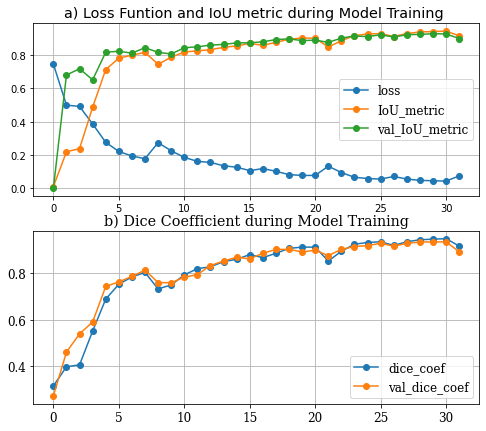

In [ ]:
plt.figure(figsize=(8,7))
plt.subplot(211)
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 12
plt.plot(results.history["loss"], label="loss", marker="o")
#plt.plot(results.history["my_iou_metric"], label="meanIoU", marker="o")
plt.plot(results.history["IoU_metric"], label="IoU_metric", marker="o")
plt.plot(results.history["val_IoU_metric"], label="val_IoU_metric", marker="o")
plt.grid()
plt.legend()
plt.title("a) Loss Funtion and IoU metric during Model Training ")
plt.subplot(212)
plt.plot(results.history["dice_coef"], label="dice_coef", marker="o")
plt.plot(results.history["val_dice_coef"], label="val_dice_coef", marker="o")
plt.grid()
plt.legend()
plt.title("b) Dice Coefficient during Model Training")

In [ ]:
def train(model, batch_size, epochs, model_name=""):
  tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/"+model_name+"_"+"{}".format(time()))
  model.reset_states()
  model.fit(X_train, Y_train, epochs=epochs, callbacks=[tensorboard], batch_size=batch_size, validation_data=(X_val, Y_val))
  metrics = model.evaluate(X, Y)
  return {k:v for k,v in zip (model.metrics_names, metrics)}

In [ ]:
#results2 = train(model=new_model,batch_size=16,epochs=30,model_name="FCN")

In [ ]:
print(results.history)#,print(metrics)

{'loss': [0.746254026889801, 0.49971383810043335, 0.4916456341743469, 0.38666898012161255, 0.2762914299964905, 0.2217479646205902, 0.19444531202316284, 0.17814087867736816, 0.2742469906806946, 0.22559323906898499, 0.18623481690883636, 0.1620401293039322, 0.15592212975025177, 0.1356155127286911, 0.12703704833984375, 0.10663440078496933, 0.11887619644403458, 0.10270320624113083, 0.08248741924762726, 0.07769635319709778, 0.07765648514032364, 0.13317103683948517, 0.0951048731803894, 0.06651271134614944, 0.05918341130018234, 0.05584743618965149, 0.07146456837654114, 0.05603737756609917, 0.04803985357284546, 0.04578213021159172, 0.04379028454422951, 0.07495718449354172], 'dice_coef': [0.31469589471817017, 0.3974640965461731, 0.4055134654045105, 0.5513955950737, 0.6891759037971497, 0.7529812455177307, 0.7848796844482422, 0.8039360642433167, 0.7331637144088745, 0.7501990795135498, 0.793327808380127, 0.8204340934753418, 0.8284794688224792, 0.8506354689598083, 0.8607800602912903, 0.8809962868690

In [ ]:
earlystopper = EarlyStopping(patience=2, verbose=1)
checkpointer = ModelCheckpoint('my_model.h5', verbose=1, save_best_only=True)
results = new_model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=5,callbacks=[earlystopper, checkpointer])

Epoch 1/5
162/162 [==============================] - 82s 494ms/step - loss: 0.1265 - accuracy: 0.9815 - val_loss: 0.0509 - val_accuracy: 0.9813

Epoch 00001: val_loss improved from inf to 0.05088, saving model to my_model.h5
Epoch 2/5
162/162 [==============================] - 72s 442ms/step - loss: 0.0800 - accuracy: 0.9815 - val_loss: 0.0469 - val_accuracy: 0.9813

Epoch 00002: val_loss improved from 0.05088 to 0.04689, saving model to my_model.h5
Epoch 3/5
162/162 [==============================] - 72s 443ms/step - loss: 0.0631 - accuracy: 0.9815 - val_loss: 0.0451 - val_accuracy: 0.9813

Epoch 00003: val_loss improved from 0.04689 to 0.04508, saving model to my_model.h5
Epoch 4/5
162/162 [==============================] - 72s 442ms/step - loss: 0.0557 - accuracy: 0.9816 - val_loss: 0.0442 - val_accuracy: 0.9813

Epoch 00004: val_loss improved from 0.04508 to 0.04416, saving model to my_model.h5
Epoch 5/5
162/162 [==============================] - 72s 443ms/step - loss: 0.0507 - acc

In [ ]:
#ids=[i for i in range(0,500,100)]
#print(ids)

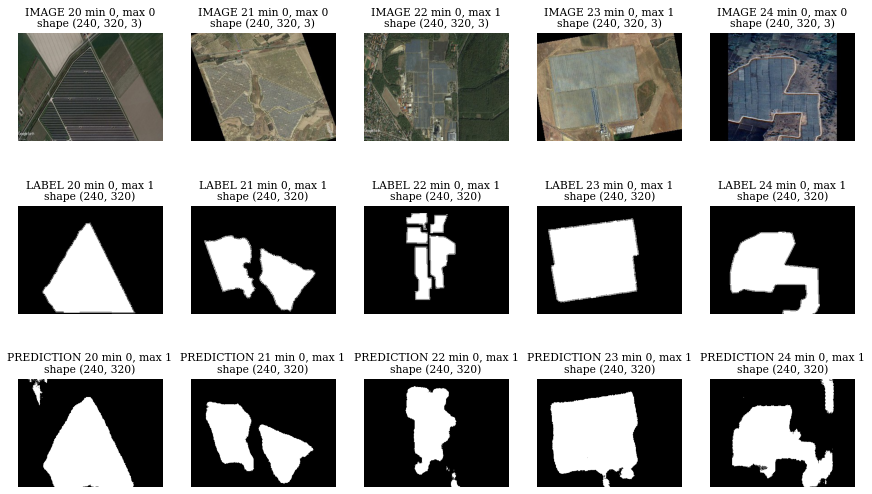

In [ ]:
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = 9
#ids = np.random.permutation(len(preds_val))[:5]
#ids= [16, 23,76,149,83]
for c,i in enumerate(ids):
    plt.subplot(3,5,c+1)
    show_img(X_train[int(X_train.shape[0]*0.9):][i]/255, "IMAGE %d"%i)
    plt.subplot(3,5,c+6)
    show_img(np.squeeze(Y_train[int(X_train.shape[0]*0.9):][i]), "LABEL %d"%i, cmap=plt.cm.Greys_r)
    plt.subplot(3,5,c+11)
    show_img(np.squeeze(preds_val_t[i]), "PREDICTION %d"%i, cmap=plt.cm.Greys_r)

In [ ]:
def getDataSorted(dataset_dir):
    X_list= sorted(glob.glob(os.path.join(dataset_dir, 'x','*.jpg')))
    Y_list = sorted(glob.glob(os.path.join(dataset_dir, 'y' ,'*.png')))
    # print(X_list)
    # print(Y_list)
    X= []
    Y= []
    for i in range(len(X_list)):
        # Load input image
        x = kImage.load_img(X_list[i])
        x = kImage.img_to_array(x)
        X.append(x)
        
        # Load ground-truth label and encode it to label 0 and 1
        y = kImage.load_img(Y_list[i], color_mode = "grayscale")#grayscale = True)
        y = kImage.img_to_array(y)
        y /= 255.0
        y = np.floor(y)# ?
        Y.append(y)
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    # Shuffle the training data
    # idx = list(range(X.shape[0]))
    # np.random.shuffle(idx)
    # X = X[idx]
    # Y = Y[idx]
    return X, Y

In [ ]:
dataset_path = os.path.join('Dataset_JPV', 'test')
X, Y = getDataSorted(dataset_path)
# predict


In [ ]:
pred = model.predict(X, verbose=1, batch_size=1)
#print("Average Test Accuracy for Amir Dataset:" ,tf.Session().run(K.mean(K.equal(Y, K.round(pred)))))

716/716 [==============================] - 38s 54ms/step


In [ ]:
preds_test = (pred > 0.5).astype(np.uint8)

In [ ]:

ids=[104,202,302,408,505]

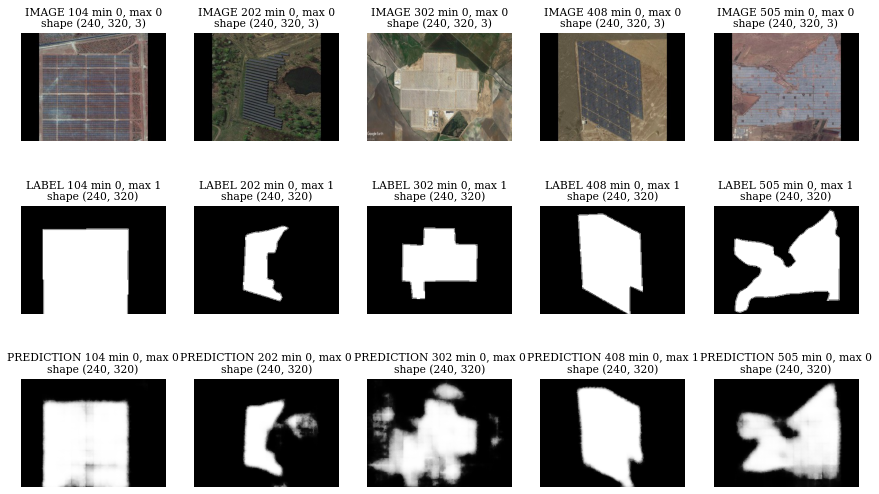

In [ ]:
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = 9
for c,i in enumerate(ids):
    plt.subplot(3,5,c+1)
    show_img(X[i]/255, "IMAGE %d"%i)
    plt.subplot(3,5,c+6)
    show_img(np.squeeze(Y[:][i]), "LABEL %d"%i, cmap=plt.cm.Greys_r)
    plt.subplot(3,5,c+11)
    show_img(np.squeeze(preds_test[i]), "PREDICTION %d"%i, cmap=plt.cm.Greys_r)

In [ ]:
Npred = new_model.predict(X, verbose=1, batch_size=1)

In [ ]:
print(pred[0:1][0][0][0])

In [ ]:
dc=dice_coef(y_true=Y, y_pred=pred.astype('float32'))
print("dice_coef. %",dc*100)

In [ ]:
mIoU=IoU_metric(y_true=Y,y_pred=pred.astype('float32'))
print("IoU metric. %",mIoU*100)

In [ ]:
dc=dice_coef(y_true=Y, y_pred=Npred.astype('float32'))
print("dice_coef. %",dc*100)
mIoU=IoU_metric(y_true=Y,y_pred=Npred.astype('float32'))
print("IoU metric. %",mIoU*100)

In [ ]:
model.save('my_trained_model.h5') 